<a href="https://colab.research.google.com/github/Atefeh1/machine_learning_projects/blob/main/linear_regression_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

first we load the data and split them into train and test datasets. as can be seen the input has 8 feature.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
housing=fetch_california_housing()
X,y= housing.data,housing.target
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
y_train=np.reshape(y_train,(-1,1))
print(x_train.shape)
print(y_train.shape)


(16512, 8)
(16512, 1)


The dataset is visualized to analyze feature distributions and variability patterns.

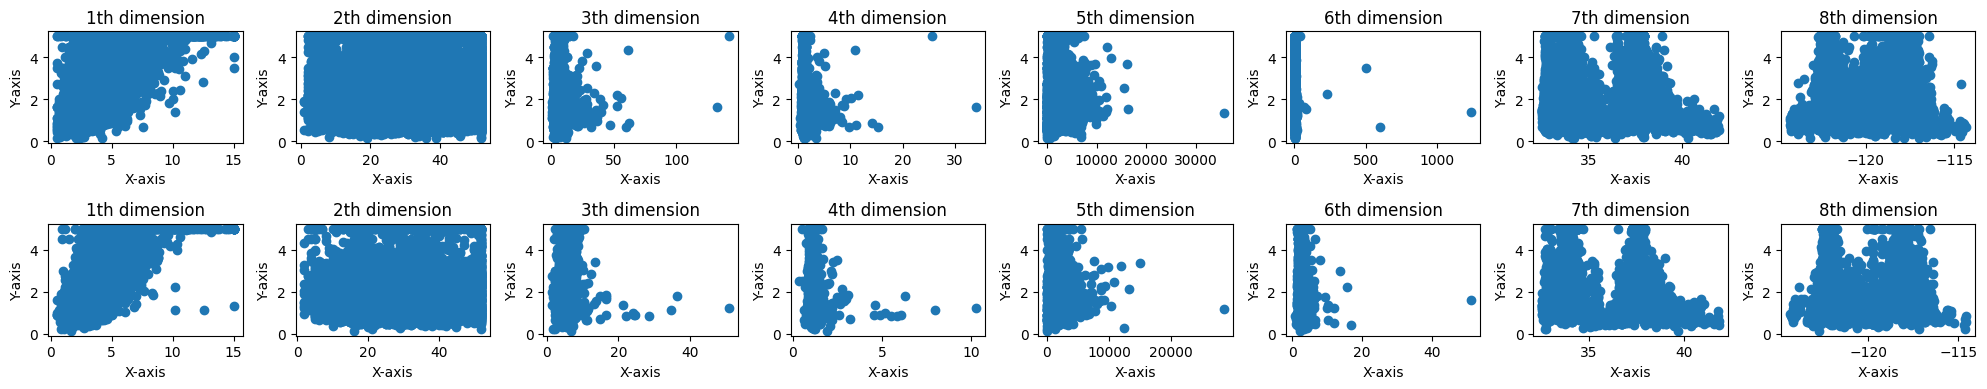

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(2, 8, figsize=(20, 4))
for j in range(8):
  row = j // 8  # Row index (0)
  col = j % 8   # Column index (0-8)
  # Plot on the jth subplot
  ax[row, col].scatter(x_train[:,j],y_train)
  ax[row, col].set_title(f'{j+1}th dimension')
  ax[row, col].set_xlabel('X-axis')
  ax[row, col].set_ylabel('Y-axis')

for j in range(8):
  row = (j+8) // 8  # Row index (1)
  col = (j+8) % 8   # Column index (0-8)
  # Plot on the third subplot
  ax[row, col].scatter(x_test[:,j],y_test)
  ax[row, col].set_title(f'{j+1}th dimension')
  ax[row, col].set_xlabel('X-axis')
  ax[row, col].set_ylabel('Y-axis')

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

Significant feature range variation necessitates dataset scaling prior to model training to prevent disproportionate weighting of higher-magnitude features and ensure unbiased parameter estimation.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

ms=MinMaxScaler()
x_train_ms=ms.fit_transform(x_train)
x_test_ms=ms.fit_transform(x_test)
ss=StandardScaler()
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.fit_transform(x_test)

Polynomial regression models of degrees 1 and 2 are evaluated using both StandardScaler and MinMaxScaler normalization techniques, with degree selection determined through validation performance comparison. The optimal model configuration employs degree 1, as evidenced by comparative Mean Squared Error metrics calculated on the validation set for both scaling methodologies

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
D=2
mse_train_ms=[]
mse_test_ms=[]
mse_train_ss=[]
mse_test_ss=[]
for i in range(D):
  poly_features=None
  poly_features=PolynomialFeatures(degree=i+1)
  x_train_ms1=poly_features.fit_transform(x_train_ms)
  x_test_ms1=poly_features.fit_transform(x_test_ms)
  print(x_train_ms1.shape)
  print(x_test_ms1.shape)
  x_train_ss1=poly_features.fit_transform(x_train_ss)
  x_test_ss1=poly_features.fit_transform(x_test_ss)
  LR=LinearRegression()
  LR.fit(x_train_ms1,y_train)
  y_pred_train_ms=LR.predict(x_train_ms1)
  y_pred_test_ms=LR.predict(x_test_ms1)
  LR1=LinearRegression()
  LR1.fit(x_train_ss1,y_train)
  y_pred_train_ss=LR1.predict(x_train_ss1)
  y_pred_test_ss=LR1.predict(x_test_ss1)
  mse_train_ms.append(mean_squared_error(y_train,y_pred_train_ms))
  mse_test_ms.append(mean_squared_error(y_test,y_pred_test_ms))
  mse_train_ss.append(mean_squared_error(y_train,y_pred_train_ss))
  mse_test_ss.append(mean_squared_error(y_test,y_pred_test_ss))
d_best_ms=mse_test_ms.index(min(mse_test_ms))+1
d_best_ss=mse_test_ss.index(min(mse_test_ss))+1
print('best degree using minmaxscaler:',d_best_ms)
print(f'MSE_train of the polynomial model with {d_best_ms} degree: {mse_train_ms[d_best_ms-1]}')
print(f'MSE_test of the polynomial model with {d_best_ms} degree: {mse_test_ms[d_best_ms-1]}')
print("======================================================================================")
print('best degree using standardscaler:',d_best_ss)
print(f'MSE_train of the polynomial model with {d_best_ss} degree: {mse_train_ss[d_best_ss-1]}')
print(f'MSE_test of the polynomial model with {d_best_ss} degree: {mse_test_ss[d_best_ss-1]}')


(16512, 9)
(4128, 9)
(16512, 55)
(4128, 55)
best degree using minmaxscaler: 1
MSE_train of the polynomial model with 1 degree: 0.5232624469073838
MSE_test of the polynomial model with 1 degree: 0.6042743210998741
best degree using standardscaler: 1
MSE_train of the polynomial model with 1 degree: 0.5232624469073837
MSE_test of the polynomial model with 1 degree: 0.5238263673742972


An analytical polynomial regression implementation (employing normal equation solution rather than scikit-learn's estimator) processes features containing only monomial terms (x^d, x^(d-1), ..., x) without cross-feature interactions. After applying both StandardScaler and MinMaxScaler normalization, degree selection via validation metrics identifies degree 2 as optimal. Comparative Mean Squared Error values for the degree-2 model under both scaling methodologies are presented.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

class fit_method:
    def __init__(self,D=1,method_name='GD'):
        self.method_name=method_name
        self.D=D
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def x_new(self,x):
        x_new_train=np.ones(x.shape[0])
        for i in range(1,self.D+1):
            x_new_train=np.c_[x_new_train,x**i]
        return x_new_train
    def Analytical_method(self,x,y):
     #   x=self.x_new(x)
        w=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        return w
    def f_x(self,x,w):
        y=x.dot(w)
        return y
    def GD_method(self,x,y,x1,y1,w,epochs=100,alpha=0.01,batch_size=32,early_stopping=False,patience=70):
     #   x=self.x_new(x)
     #   x1=self.x_new(x1)
        mse_train=np.zeros(epochs)
        mse_test=np.zeros(epochs)
        iteration=int(x.shape[0]/batch_size)
        mse_min=np.inf
        mse_train1=None
        index=0
        for j in range(epochs):
            for i in range(iteration):
                gw=np.mean(np.repeat((self.f_x(x[batch_size*i:batch_size*(i+1),:],w)-y[batch_size*i:batch_size*(i+1),:]),x.shape[1],axis=1)*x[batch_size*i:batch_size*(i+1),:],axis=0,keepdims=True)
                w =w-alpha*gw.reshape(-1,1)
       #     print(w.shape)
            y_pred_train=self.f_x(x,w)
            y_pred_test=self.f_x(x1,w)
            mse_train[j]=mean_squared_error(y,y_pred_train)
            mse_test[j]=mean_squared_error(y1,y_pred_test)
            if mse_test[j]<mse_min:
              mse_min=mse_test[j]
              mse_train1=mse_train[j]
              index=j
            if j>=patience and early_stopping:
              if j-index>patience:
                print('early stopping')
                break
        return w,mse_train,mse_test,(mse_min,mse_train1,index)
D=4
mse_train_ms=[]
mse_test_ms=[]
mse_train_ss=[]
mse_test_ss=[]
w_ms=[]
w_ss=[]
for i in range(1,D):
  np.random.seed(4)
 # w=np.random.randn(x_train_ms.shape[1],1)
  LR=fit_method(D=i)
  x_train_ms2=LR.x_new(x_train_ms)
  x_test_ms2=LR.x_new(x_test_ms)
  print(x_train_ms2.shape)
  print(x_test_ms2.shape)
  w=LR.Analytical_method(x_train_ms2,y_train)
  w_ms.append([w])
  y_pred_train_ms=LR.f_x(x_train_ms2,w)
  y_pred_test_ms=LR.f_x(x_test_ms2,w)
  LR1=fit_method(D=i)
  x_train_ss2=LR1.x_new(x_train_ss)
  x_test_ss2=LR1.x_new(x_test_ss)
  w1=LR1.Analytical_method(x_train_ss2,y_train)
  w_ss.append([w1])
  y_pred_train_ss=LR1.f_x(x_train_ss2,w1)
  y_pred_test_ss=LR1.f_x(x_test_ss2,w1)
  mse_train_ms.append(mean_squared_error(y_train,y_pred_train_ms))
  mse_test_ms.append(mean_squared_error(y_test,y_pred_test_ms))
  mse_train_ss.append(mean_squared_error(y_train,y_pred_train_ss))
  mse_test_ss.append(mean_squared_error(y_test,y_pred_test_ss))
d_best_ms=mse_test_ms.index(min(mse_test_ms))+1
d_best_ss=mse_test_ss.index(min(mse_test_ss))+1
print('best degree using minmaxscaler:',d_best_ms)
print(f'MSE_train of the polynomial model with {d_best_ms} degree: {mse_train_ms[d_best_ms-1]}')
print(f'MSE_test of the polynomial model with {d_best_ms} degree: {mse_test_ms[d_best_ms-1]}')
print("======================================================================================")
print('best degree using standardscaler:',d_best_ss)
print(f'MSE_train of the polynomial model with {d_best_ss} degree: {mse_train_ss[d_best_ss-1]}')
print(f'MSE_test of the polynomial model with {d_best_ss} degree: {mse_test_ss[d_best_ss-1]}')


(16512, 9)
(4128, 9)
(16512, 17)
(4128, 17)
(16512, 25)
(4128, 25)
best degree using minmaxscaler: 2
MSE_train of the polynomial model with 2 degree: 0.5024150650903254
MSE_test of the polynomial model with 2 degree: 0.5829108147305779
best degree using standardscaler: 2
MSE_train of the polynomial model with 2 degree: 0.5024150650903253
MSE_test of the polynomial model with 2 degree: 0.4974947547504076


The degree-1 polynomial regression model is visualized using Matplotlib, with each row representing model behavior across one of the eight feature dimensions. Training data fit is displayed in the first row, while test dataset performance is presented in the second row

(50, 8)
(50, 1)


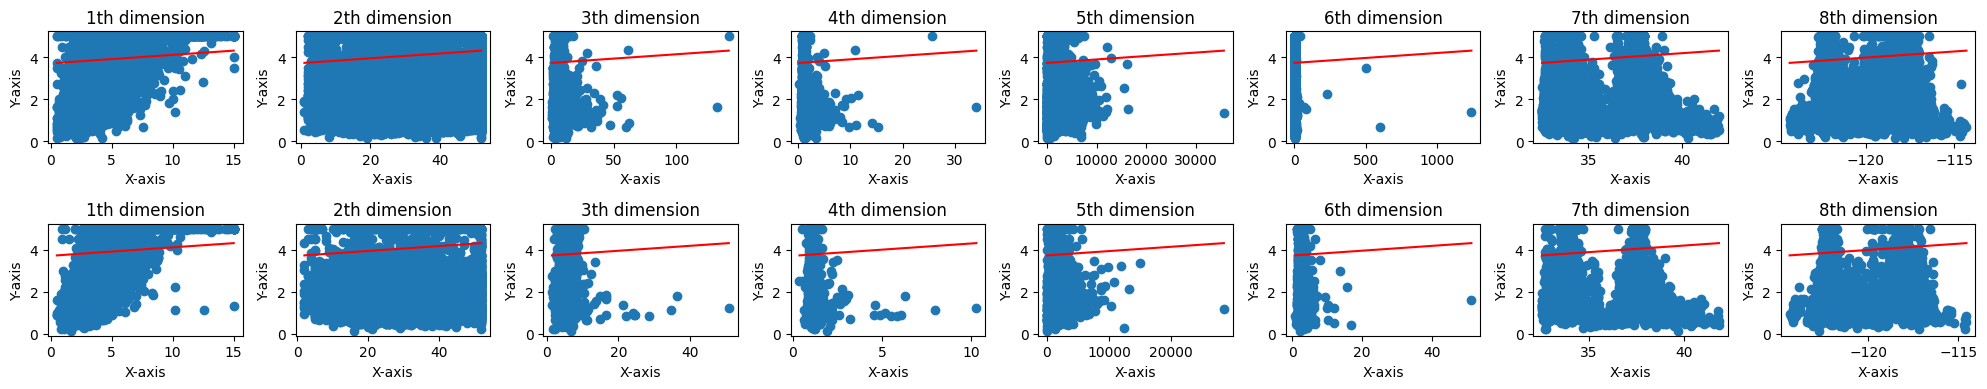

In [ ]:
import matplotlib.pyplot as plt
x_fit=np.linspace(np.min(x_train,axis=0),np.max(x_train,axis=0),50,axis=0)
fm=fit_method(D=1)
x_fit_ms2=ms.fit_transform(x_fit)
x_fit_ms2=fm.x_new(x_fit_ms2)
y_fit=fm.f_x(x_fit_ms2,w_ms[0][0])
print(x_fit.shape)
print(y_fit.shape)

fig, ax = plt.subplots(2, 8, figsize=(20, 4))
for j in range(8):
  row = j // 8  # Row index (0)
  col = j % 8   # Column index (0-8)
  # Plot on the jth subplot
  ax[row, col].plot(x_fit[:,j], y_fit,'r-')
#ax1.scatter(x_train1[:,6], y_pred_train)
  ax[row, col].scatter(x_train[:,j],y_train)
  ax[row, col].set_title(f'{j+1}th dimension')
  ax[row, col].set_xlabel('X-axis')
  ax[row, col].set_ylabel('Y-axis')


x_fit1=np.linspace(np.min(x_test,axis=0),np.max(x_test,axis=0),50,axis=0)
fm1=fit_method(D=1)
x_fit_ms3=ms.fit_transform(x_fit1)
x_fit_ms3=fm1.x_new(x_fit_ms3)
y_fit1=fm1.f_x(x_fit_ms3,w_ms[0][0])
for j in range(8):
  row = (j+8) // 8  # Row index (1)
  col = (j+8) % 8   # Column index (0-8)
  # Plot on the third subplot
  ax[row, col].plot(x_fit1[:,j], y_fit1,'r-')
  ax[row, col].scatter(x_test[:,j],y_test)
  ax[row, col].set_title(f'{j+1}th dimension')
  ax[row, col].set_xlabel('X-axis')
  ax[row, col].set_ylabel('Y-axis')

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

Batch gradient descent optimizes the linear regression model using both MinMaxScaler and StandardScaler normalized data. The optimal learning rate is determined through empirical evaluation across multiple learning rates with 500 training epochs, selecting the rate that minimizes test set Mean Squared Error (MSE) while monitoring training set performance for convergence behavior.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

class fit_method:
    def __init__(self,D=1,method_name='GD'):
        self.method_name=method_name
        self.D=D
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def x_new(self,x):
        x_new_train=np.ones(x.shape[0])
        for i in range(1,self.D+1):
            x_new_train=np.c_[x_new_train,x**i]
        return x_new_train
    def Analytical_method(self,x,y):
     #   x=self.x_new(x)
        w=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        return w
    def f_x(self,x,w):
        y=x.dot(w)
        return y
    def GD_method(self,x,y,x1,y1,w,epochs=100,alpha=0.01,batch_size=32,early_stopping=False,patience=70):
     #   x=self.x_new(x)
     #   x1=self.x_new(x1)
        mse_train=np.zeros(epochs)
        mse_test=np.zeros(epochs)
        iteration=int(x.shape[0]/batch_size)
        mse_min=np.inf
        mse_train1=None
        index=0
        for j in range(epochs):
            for i in range(iteration):
                gw=np.mean(np.repeat((self.f_x(x[batch_size*i:batch_size*(i+1),:],w)-y[batch_size*i:batch_size*(i+1),:]),x.shape[1],axis=1)*x[batch_size*i:batch_size*(i+1),:],axis=0,keepdims=True)
                w =w-alpha*gw.reshape(-1,1)
       #     print(w.shape)
            y_pred_train=self.f_x(x,w)
            y_pred_test=self.f_x(x1,w)
            mse_train[j]=mean_squared_error(y,y_pred_train)
            mse_test[j]=mean_squared_error(y1,y_pred_test)
            if mse_test[j]<mse_min:
              mse_min=mse_test[j]
              mse_train1=mse_train[j]
              index=j
            if j>=patience and early_stopping:
              if j-index>patience:
                print('early stopping')
                break
        return w,mse_train,mse_test,(mse_min,mse_train1,index)
D=4
mse_train_ms=[]
mse_train_ss=[]
mse_min_test_ms=[]
mse_min_test_ss=[]
index_ms=[]
index_ss=[]
w_ms=[]
w_ss=[]
epochs=500
a=[0.001,0.005,0.01,0.05,0.1,0.5,1]
batch_size=x_train_ms.shape[0]
for alpha in a:
  np.random.seed(4)
  LR=fit_method(D=1)
  x_train_ms4=LR.x_new(x_train_ms)
  x_test_ms4=LR.x_new(x_test_ms)
  w0=np.random.randn(x_train_ms4.shape[1],1)
  w,mse_train_t,mse_test,(mse_min_ms,mse_train,index)=LR.GD_method(x_train_ms4,y_train,x_test_ms4,y_test,w0,epochs=epochs,alpha=alpha,batch_size=batch_size)
  mse_min_test_ms=mse_min_test_ms+[mse_min_ms]
  mse_train_ms.append(mse_train)
  index_ms=index_ms+[index]
  w_ms.append([w])

  LR1=fit_method(D=1)
  x_train_ss4=LR1.x_new(x_train_ss)
  x_test_ss4=LR1.x_new(x_test_ss)
  w1,mse_train1_t,mse_test1,(mse_min_ss,mse_train1,index1)=LR1.GD_method(x_train_ss4,y_train,x_test_ss4,y_test,w0,epochs=epochs,alpha=alpha,batch_size=batch_size)
  mse_min_test_ss=mse_min_test_ss+[mse_min_ss]
  mse_train_ss.append(mse_train1)
  index_ss=index_ss+[index1]
  w_ss.append([w1])



The optimal learning rates for models trained with MinMaxScaler and StandardScaler normalization, along with their corresponding training and test Mean Squared Error metrics, are presented.

In [ ]:
index_best_ms=mse_min_test_ms.index(min(mse_min_test_ms))
index_best_ss=mse_min_test_ss.index(min(mse_min_test_ss))
print('best alpha using minmaxscaler:',a[index_best_ms])
print(f'MSE_train of the model trained on data scaled by minmaxscaler: {mse_train_ms[index_best_ms]}')
print(f'MSE_test of the model trained on data scaled by minmaxscaler: {mse_min_test_ms[index_best_ms]}')
print("====================================================================================================")
print('best alpha using standardscaler:',a[index_best_ss])
print(f'MSE_train of the model trained on data scaled by standardscaler: {mse_train_ss[index_best_ss]}')
print(f'MSE_test of the model trained on data scaled by satndardscaler: {mse_min_test_ss[index_best_ss]}')

best alpha using minmaxscaler: 1
MSE_train of the model trained on data scaled by minmaxscaler: 0.5529267408721853
MSE_test of the model trained on data scaled by minmaxscaler: 0.551812807631686
best alpha using standardscaler: 0.1
MSE_train of the model trained on data scaled by standardscaler: 0.5260004476251826
MSE_test of the model trained on data scaled by satndardscaler: 0.5217173890759732


Comparative analysis of Mean Squared Error versus learning rate for both scaling methodologies reveals distinct convergence behaviors: StandardScaler-based models exhibit performance degradation at elevated learning rates, whereas MinMaxScaler-normalized models demonstrate improved convergence with higher learning rates. This divergence stems from fundamental differences in feature normalization properties.

**Mathematical Explanation of Learning Rate Constraints**

For linear regression gradient descent, maximum stable learning rate is governed by:

α_max ≈ 2/λ_max

where λ_max represents the dominant eigenvalue of the Hessian matrix X^T X.

**MinMaxScaler** (range [0,1]):
* Yields constrained feature distributions with uniformly bounded eigenvalues (λ_max ≈ n(number of samples))
* Permits larger learning rates (typically 1.5-2.0)

**StandardScaler** (μ=0, σ=1):
* Features have mean 0 and std 1, but can have values > 1.
* If original data has outliers (since StandardScaler preserves outlier sensitivity), X^T X can have much larger eigenvalues than with MinMax.
* This requires smaller learning rates (typically < 1.0) to maintain convergence stability

This eigenvalue disparity explains MinMaxScaler's superior tolerance for aggressive learning rates in gradient descent optimization.

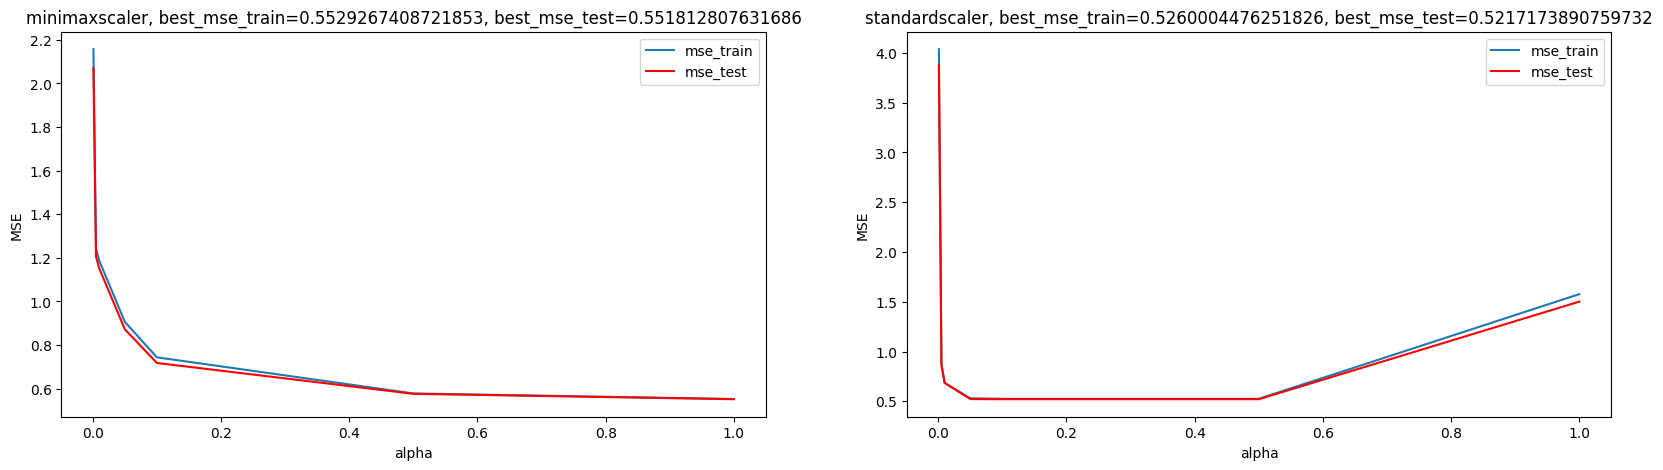

In [ ]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(a,mse_train_ms,label='mse_train')
ax1.plot(a,mse_min_test_ms,'r',label='mse_test')
ax1.set_xlabel('alpha')
ax1.set_ylabel('MSE')
ax1.set_title(f'minimaxscaler, best_mse_train={mse_train_ms[index_best_ms]}, best_mse_test={mse_min_test_ms[index_best_ms]}')
ax1.legend()

ax2.plot(a,mse_train_ss,label='mse_train')
ax2.plot(a,mse_min_test_ss,'r',label='mse_test')
ax2.set_xlabel('alpha')
ax2.set_ylabel('MSE')
ax2.set_title(f'standardscaler, best_mse_train={mse_train_ss[index_best_ss]}, best_mse_test={mse_min_test_ss[index_best_ss]}')
ax2.legend()
plt.show()

Batch gradient descent optimizes the linear regression model using both MinMaxScaler and StandardScaler normalized data with fixed learning rates determined in the prior analysis. Optimal number of epochs is identified through empirical evaluation of training and test Mean Squared Error across multiple iteration counts, selecting the point of minimal test set error to ensure optimal generalization performance.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

class fit_method:
    def __init__(self,D=1,method_name='GD'):
        self.method_name=method_name
        self.D=D
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def x_new(self,x):
        x_new_train=np.ones(x.shape[0])
        for i in range(1,self.D+1):
            x_new_train=np.c_[x_new_train,x**i]
        return x_new_train
    def Analytical_method(self,x,y):
     #   x=self.x_new(x)
        w=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        return w
    def f_x(self,x,w):
        y=x.dot(w)
        return y
    def GD_method(self,x,y,x1,y1,w,epochs=100,alpha=0.01,batch_size=32,early_stopping=False,patience=70):
     #   x=self.x_new(x)
     #   x1=self.x_new(x1)
        mse_train=np.zeros(epochs)
        mse_test=np.zeros(epochs)
        iteration=int(x.shape[0]/batch_size)
        mse_min=np.inf
        mse_train1=None
        index=0
        for j in range(epochs):
            for i in range(iteration):
                gw=np.mean(np.repeat((self.f_x(x[batch_size*i:batch_size*(i+1),:],w)-y[batch_size*i:batch_size*(i+1),:]),x.shape[1],axis=1)*x[batch_size*i:batch_size*(i+1),:],axis=0,keepdims=True)
                w =w-alpha*gw.reshape(-1,1)
       #     print(w.shape)
            y_pred_train=self.f_x(x,w)
            y_pred_test=self.f_x(x1,w)
            mse_train[j]=mean_squared_error(y,y_pred_train)
            mse_test[j]=mean_squared_error(y1,y_pred_test)
            if mse_test[j]<mse_min:
              mse_min=mse_test[j]
              mse_train1=mse_train[j]
              index=j
            if j>=patience and early_stopping:
              if j-index>patience:
                print('early stopping')
                break
        return w,mse_train,mse_test,(mse_min,mse_train1,index)
e=[1000]
batch_size=x_train_ms.shape[0]
for epochs in e:
  np.random.seed(4)
  LR=fit_method(D=1)
  x_train_ms5=LR.x_new(x_train_ms)
  x_test_ms5=LR.x_new(x_test_ms)
  w0=np.random.randn(x_train_ms5.shape[1],1)
  w,mse_train_ms,mse_test_ms,(mse_min_ms,mse_train,index)=LR.GD_method(x_train_ms5,y_train,x_test_ms5,y_test,w0,epochs=epochs,alpha=1,batch_size=batch_size)
  LR1=fit_method(D=1)
  x_train_ss5=LR1.x_new(x_train_ss)
  x_test_ss5=LR1.x_new(x_test_ss)
  w1,mse_train_ss,mse_test_ss,(mse_min_ss,mse_train1,index1)=LR1.GD_method(x_train_ss5,y_train,x_test_ss5,y_test,w0,epochs=epochs,alpha=0.1,batch_size=batch_size)




Optimal number of epochs for models trained with both scaling methodologies, along with their corresponding training and test Mean Squared Error metrics, are presented.

In [ ]:
epoch_best_ms=np.argmin(mse_test_ms)+1
epoch_best_ss=np.argmin(mse_test_ss)+1
print('best number of epochs using minmaxscaler:',epoch_best_ms)
print(f'MSE_train of the model trained on data scaled by minmaxscaler: {mse_train_ms[epoch_best_ms-1]}')
print(f'MSE_test of the model trained on data scaled by minmaxscaler: {mse_test_ms[epoch_best_ms-1]}')
print("====================================================================================================")
print('best number of epochs using standardscaler:',epoch_best_ss)
print(f'MSE_train of the model trained on data scaled by satndardscaler: {mse_train_ss[epoch_best_ss-1]}')
print(f'MSE_test of the model trained on data scaled by standardscaler: {mse_test_ss[epoch_best_ss-1]}')

best number of epochs using minmaxscaler: 1000
MSE_train of the model trained on data scaled by minmaxscaler: 0.5398740232871531
MSE_test of the model trained on data scaled by minmaxscaler: 0.5379310552096126
best number of epochs using standardscaler: 324
MSE_train of the model trained on data scaled by satndardscaler: 0.5260004476251826
MSE_test of the model trained on data scaled by standardscaler: 0.5217173890759732


TThe relationship between Mean Squared Error and training epochs is visualized across both MinMaxScaler and StandardScaler normalization techniques, comparing convergence behavior on training and test datasets.

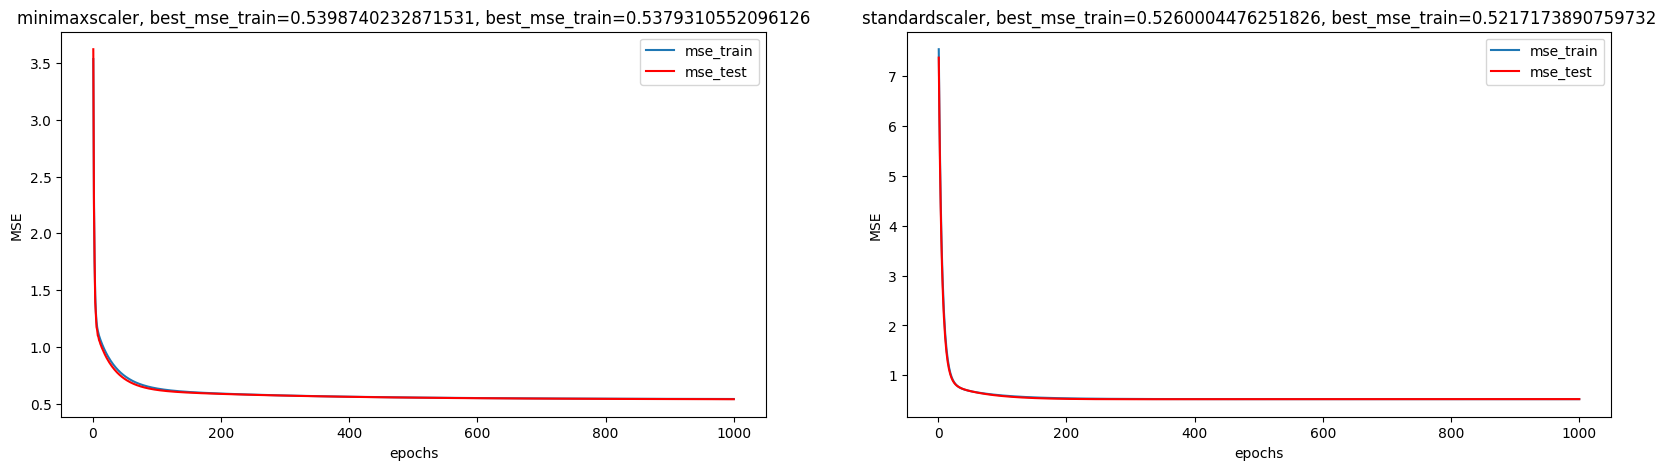

In [ ]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
epochs=np.linspace(1,1000,1000)
ax1.plot(epochs,mse_train_ms,label='mse_train')
ax1.plot(epochs,mse_test_ms,'r',label='mse_test')
ax1.set_xlabel('epochs')
ax1.set_ylabel('MSE')
ax1.set_title(f'minimaxscaler, best_mse_train={mse_train_ms[epoch_best_ms-1]}, best_mse_train={mse_test_ms[epoch_best_ms-1]}')
ax1.legend()

ax2.plot(epochs,mse_train_ss,label='mse_train')
ax2.plot(epochs,mse_test_ss,'r',label='mse_test')
ax2.set_xlabel('epochs')
ax2.set_ylabel('MSE')
ax2.set_title(f'standardscaler, best_mse_train={mse_train_ss[epoch_best_ss-1]}, best_mse_train={mse_test_ss[epoch_best_ss-1]}')
ax2.legend()
plt.show()

In this Section,mini-batch gradient descent optimizes the linear regression model using both MinMaxScaler and StandardScaler normalized data with fixed learning rates from prior analysis. Optimal batch size selection is determined through empirical evaluation of training and test Mean Squared Error across multiple batch configurations.

But there is a problem with this method and that is Gradient Descent Instability with Small Batch Sizes due to exploding gradients with small batch sizes.

**Why Small Batch Sizes Cause Overflow Errors?**

With small batch sizes (especially 1-10), gradient descent becomes highly unstable because:
1. **High gradient variance**: Small batches produce noisy gradient estimates
2. **Overshooting**: Large weight updates push the model far from the optimum
3. **Positive feedback loop**: Once weights grow large, predictions explode → larger gradients → even larger weights
This is why we see stable behavior initially but sudden overflow after some epochs - the instability builds up gradually until numerical limits are exceeded.

some of the methods to fix this :
1. **Adaptive Gradient Clipping**: This scales the clipping threshold appropriately: more clipping for smaller batches and prevents single examples from causing massive weight updates
2. **Batch-size proportional learning rates**: it scales learning rate with (batch_size)/(the number of inputs(N)) for GD.(For batch_size=1, we need learning rates ~1/N smaller than full batch).
This automatically adjusts updates to be appropriate for the batch size

so the gradient descent method is revised with the mentioned solutions. First identifying the minimum stable batch size threshold (130+) that prevents overflow errors without stabilization techniques, we subsequently determine the optimal batch size using standard gradient descent methodology within this numerically stable regime.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

class fit_method:
    def __init__(self,D=1,method_name='GD'):
        self.method_name=method_name
        self.D=D
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def x_new(self,x):
        x_new_train=np.ones(x.shape[0])
        for i in range(1,self.D+1):
            x_new_train=np.c_[x_new_train,x**i]
        return x_new_train
    def Analytical_method(self,x,y):
     #   x=self.x_new(x)
        w=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        return w
    def f_x(self,x,w):
        y=x.dot(w)
        return y
    def GD_method(self,x,y,x1,y1,w,epochs=100,alpha=0.01,batch_size=32,early_stopping=False,patience=70, max_grad_norm=None, gradient_clip=True,adj_alpha=False):
     #   x=self.x_new(x)
     #   x1=self.x_new(x1)
        # Adaptive gradient clipping threshold based on batch size
        if max_grad_norm is None:
        # Larger batches need less clipping, smaller batches need more
          max_grad_norm = 5.0 * (np.sqrt(batch_size) / np.sqrt(x.shape[0]))
        mse_train=np.zeros(epochs)
        mse_test=np.zeros(epochs)
        iteration=int(x.shape[0]/batch_size)
        mse_min=np.inf
        mse_train1=None
        index=0
        for j in range(epochs):
            for i in range(iteration):
                gw=((x[batch_size*i:batch_size*(i+1),:]).T).dot(self.f_x(x[batch_size*i:batch_size*(i+1),:],w)-y[batch_size*i:batch_size*(i+1),:])/(batch_size)
                #np.mean(np.repeat((self.f_x(x[batch_size*i:batch_size*(i+1),:],w)-y[batch_size*i:batch_size*(i+1),:]),x.shape[1],axis=1)*x[batch_size*i:batch_size*(i+1),:],axis=0,keepdims=True)
                # Track gradient norm
                grad_norm = np.linalg.norm(gw)
                # CRITICAL: Gradient clipping for small batches
                if gradient_clip and grad_norm > max_grad_norm:
                  gw = gw * (max_grad_norm / grad_norm)
                # Weight update with batch size adjustment
                # Smaller batches need smaller updates
                if adj_alpha:
                  alpha = alpha * (batch_size / x.shape[0])
                w =w-alpha*gw.reshape(-1,1)
            y_pred_train=self.f_x(x,w)
            y_pred_test=self.f_x(x1,w)
            mse_train[j]=mean_squared_error(y,y_pred_train)
            mse_test[j]=mean_squared_error(y1,y_pred_test)
            if mse_test[j]<mse_min:
              mse_min=mse_test[j]
              mse_train1=mse_train[j]
              index=j
            if j>=patience and early_stopping:
              if j-index>patience:
                print('early stopping')
                break
        return w,mse_train,mse_test,(mse_min,mse_train1,index)
D=4
mse_train_ms=[]
mse_train_ss=[]
mse_min_test_ms=[]
mse_min_test_ss=[]
index_ms=[]
index_ss=[]
w_ms=[]
w_ss=[]
epochs=500
b=[131,200,300,500,1000]
epochs=500
for batch_size in b:
  print("===================================================================================================")
  print(batch_size)
  np.random.seed(4)
  LR=fit_method(D=1)
  x_train_ms6=LR.x_new(x_train_ms)
  x_test_ms6=LR.x_new(x_test_ms)
  w0=np.random.randn(x_train_ms6.shape[1],1)
#  w,mse_train_t,mse_test,(mse_min_ms,mse_train,index)=LR.GD_method(x_train_ms6,y_train,x_test_ms6,y_test,w0,epochs=epochs,alpha=1,batch_size=batch_size,gradient_clip=False,adj_alpha=False)
#  mse_min_test_ms=mse_min_test_ms+[mse_min_ms]
#  mse_train_ms.append(mse_train)
#  index_ms=index_ms+[index]
#  w_ms.append([w])

  LR1=fit_method(D=1)
  x_train_ss6=LR1.x_new(x_train_ss)
  x_test_ss6=LR1.x_new(x_test_ss)
  w1,mse_train1_t,mse_test1,(mse_min_ss,mse_train1,index1)=LR1.GD_method(x_train_ss6,y_train,x_test_ss6,y_test,w0,epochs=epochs,alpha=0.1,batch_size=batch_size,gradient_clip=False,adj_alpha=False)
  mse_min_test_ss=mse_min_test_ss+[mse_min_ss]
  mse_train_ss.append(mse_train1)
  index_ss=index_ss+[index1]
  w_ss.append([w1])



131
200
300
500
1000


Optimal batch sizes for models trained with both MinMaxScaler and StandardScaler normalization methodologies, along with their corresponding training and test Mean Squared Error metrics, are presented.

In [ ]:
index_best_ms=mse_min_test_ms.index(min(mse_min_test_ms))
index_best_ss=mse_min_test_ss.index(min(mse_min_test_ss))
print('best batch size using minmaxscaler and original GD:',b[index_best_ms])
print(f'MSE_train of the model trained on data scaled by minmaxscaler: {mse_train_ms[index_best_ms]}')
print(f'MSE_test of the model trained on data scaled by minmaxscaler: {mse_min_test_ms[index_best_ms]}')
print("====================================================================================================")
print('best batch size using standardscaler and original GD:',b[index_best_ss])
print(f'MSE_train of the model trained on data scaled by standardscaler: {mse_train_ss[index_best_ss]}')
print(f'MSE_test of the model trained on data scaled by satndardscaler: {mse_min_test_ss[index_best_ss]}')

best batch size using minmaxscaler and original GD: 500
MSE_train of the model trained on data scaled by minmaxscaler: 0.5353791686734372
MSE_test of the model trained on data scaled by minmaxscaler: 0.5222842616230052
best batch size using standardscaler and original GD: 1000
MSE_train of the model trained on data scaled by standardscaler: 0.529906266811907
MSE_test of the model trained on data scaled by satndardscaler: 0.5292522049114828


Comparative analysis of Mean Squared Error versus batch size reveals elevated fluctuation in MinMaxScaler-normalized models compared to StandardScaler counterparts. This divergence stems from fundamental differences in optimization landscape symmetry:

For linear regression, the gradient component for feature j is:
∇_j = (1/m) · Σ[(ŷ - y) · x_j]

**MinMaxScaler (x ∈ [0,1]):**

* Generates strictly non-negative feature values, creating directional bias in gradient updates
* Small batches exhibit high variance due to sampling imbalance (e.g., [0.1,0.2,0.3] vs [0.7,0.8,0.9])
* Prediction error direction solely determines gradient orientation without internal cancellation

**StandardScaler (x ∈ [-a,b]):**

* Preserves symmetric feature distribution with balanced positive/negative values
* Gradient components naturally cancel through opposing contributions (e.g., [-1.2,-0.8,0.3])
* Inherent variance reduction happens through batch-level balancing effects

This structural difference explains MinMaxScaler's heightened sensitivity to batch composition and consequent MSE instability in mini-batch optimization.

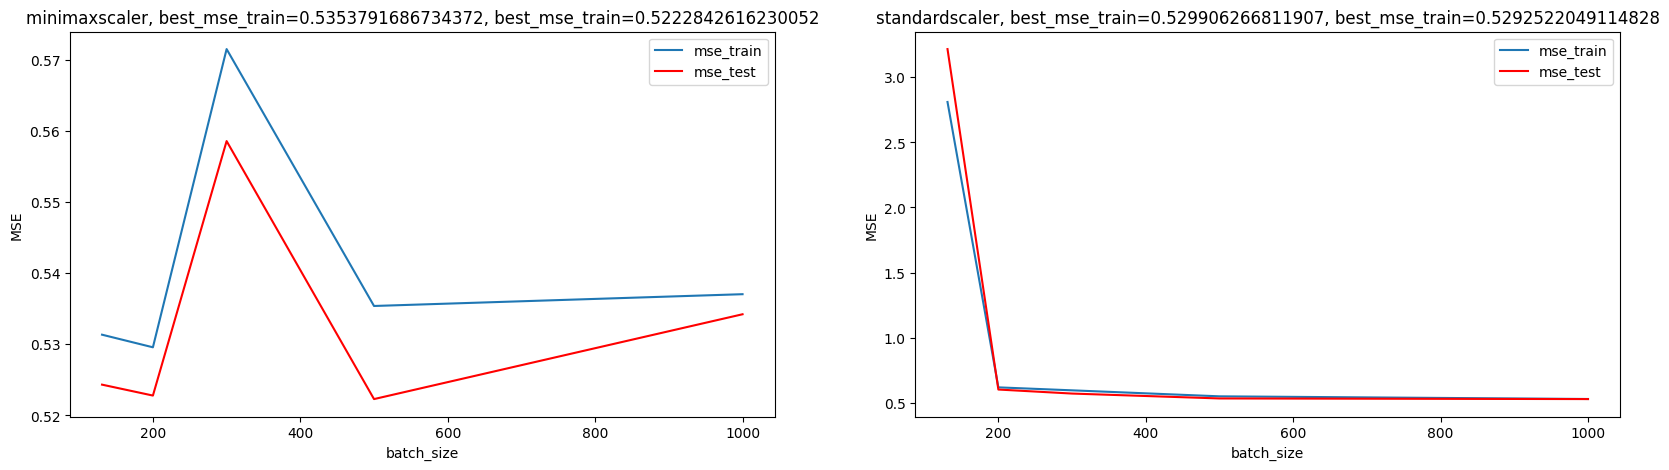

In [ ]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(b,mse_train_ms,label='mse_train')
ax1.plot(b,mse_min_test_ms,'r',label='mse_test')
ax1.set_xlabel('batch_size')
ax1.set_ylabel('MSE')
ax1.set_title(f'minimaxscaler, best_mse_train={mse_train_ms[index_best_ms]}, best_mse_train={mse_min_test_ms[index_best_ms]}')
ax1.legend()

ax2.plot(b,mse_train_ss,label='mse_train')
ax2.plot(b,mse_min_test_ss,'r',label='mse_test')
ax2.set_xlabel('batch_size')
ax2.set_ylabel('MSE')
ax2.set_title(f'standardscaler, best_mse_train={mse_train_ss[index_best_ss]}, best_mse_train={mse_min_test_ss[index_best_ss]}')
ax2.legend()
plt.show()

Gradient descent with adaptive learning rate scheduling (excluding gradient clipping) identifies the optimal batch size through 500 training epochs, employing learning rates of 1.0 for MinMaxScaler-normalized data and 0.1 for StandardScaler-normalized data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

class fit_method:
    def __init__(self,D=1,method_name='GD'):
        self.method_name=method_name
        self.D=D
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def x_new(self,x):
        x_new_train=np.ones(x.shape[0])
        for i in range(1,self.D+1):
            x_new_train=np.c_[x_new_train,x**i]
        return x_new_train
    def Analytical_method(self,x,y):
     #   x=self.x_new(x)
        w=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        return w
    def f_x(self,x,w):
        y=x.dot(w)
        return y
    def GD_method(self,x,y,x1,y1,w,epochs=100,alpha=0.01,batch_size=32,early_stopping=False,patience=70, max_grad_norm=None, gradient_clip=True,adj_alpha=False):
     #   x=self.x_new(x)
     #   x1=self.x_new(x1)
        # Adaptive gradient clipping threshold based on batch size
        if max_grad_norm is None:
        # Larger batches need less clipping, smaller batches need more
          max_grad_norm = 5.0 * (np.sqrt(batch_size) / np.sqrt(x.shape[0]))
        mse_train=np.zeros(epochs)
        mse_test=np.zeros(epochs)
        iteration=int(x.shape[0]/batch_size)
        mse_min=np.inf
        mse_train1=None
        index=0
        for j in range(epochs):
            for i in range(iteration):
                gw=np.mean(np.repeat((self.f_x(x[batch_size*i:batch_size*(i+1),:],w)-y[batch_size*i:batch_size*(i+1),:]),x.shape[1],axis=1)*x[batch_size*i:batch_size*(i+1),:],axis=0,keepdims=True)
                # Track gradient norm
                grad_norm = np.linalg.norm(gw)
                # CRITICAL: Gradient clipping for small batches
                if gradient_clip and grad_norm > max_grad_norm:
                  gw = gw * (max_grad_norm / grad_norm)
                # Weight update with batch size adjustment
                # Smaller batches need smaller updates
                if adj_alpha:
                  alpha = alpha * (batch_size / x.shape[0])
                w =w-alpha*gw.reshape(-1,1)
            y_pred_train=self.f_x(x,w)
            y_pred_test=self.f_x(x1,w)
            mse_train[j]=mean_squared_error(y,y_pred_train)
            mse_test[j]=mean_squared_error(y1,y_pred_test)
            if mse_test[j]<mse_min:
              mse_min=mse_test[j]
              mse_train1=mse_train[j]
              index=j
            if j>=patience and early_stopping:
              if j-index>patience:
                print('early stopping')
                break
        return w,mse_train,mse_test,(mse_min,mse_train1,index)
D=4
mse_train_ms=[]
mse_train_ss=[]
mse_min_test_ms=[]
mse_min_test_ss=[]
index_ms=[]
index_ss=[]
w_ms=[]
w_ss=[]
epochs=500
b=[1,5,20,50,100,500,1000]
epochs=500
for batch_size in b:
  print("===================================================================================================")
  print(batch_size)
  np.random.seed(4)
  LR=fit_method(D=1)
  x_train_ms7=LR.x_new(x_train_ms)
  x_test_ms7=LR.x_new(x_test_ms)
  w0=np.random.randn(x_train_ms7.shape[1],1)
  w,mse_train_t,mse_test,(mse_min_ms,mse_train,index)=LR.GD_method(x_train_ms7,y_train,x_test_ms7,y_test,w0,epochs=epochs,alpha=1,batch_size=batch_size,gradient_clip=False,adj_alpha=True)
  mse_min_test_ms=mse_min_test_ms+[mse_min_ms]
  mse_train_ms.append(mse_train)
  index_ms=index_ms+[index]
  w_ms.append([w])

  LR1=fit_method(D=1)
  x_train_ss7=LR1.x_new(x_train_ss)
  x_test_ss7=LR1.x_new(x_test_ss)
  w1,mse_train1_t,mse_test1,(mse_min_ss,mse_train1,index1)=LR1.GD_method(x_train_ss7,y_train,x_test_ss7,y_test,w0,epochs=epochs,alpha=0.1,batch_size=batch_size,gradient_clip=False,adj_alpha=True)
  mse_min_test_ss=mse_min_test_ss+[mse_min_ss]
  mse_train_ss.append(mse_train1)
  index_ss=index_ss+[index1]
  w_ss.append([w1])



1
5
20
50
100
500
1000


Optimal batch sizes for gradient descent models trained with MinMaxScaler and StandardScaler normalization (using adaptive learning rates without gradient clipping), along with their corresponding training and test Mean Squared Error metrics, are presented.

In [ ]:
index_best_ms=mse_min_test_ms.index(min(mse_min_test_ms))
index_best_ss=mse_min_test_ss.index(min(mse_min_test_ss))
print('best batch size using minmaxscaler and adjust alpha:',b[index_best_ms])
print(f'MSE_train of the model trained on data scaled by minmaxscaler: {mse_train_ms[index_best_ms]}')
print(f'MSE_test of the model trained on data scaled by minmaxscaler: {mse_min_test_ms[index_best_ms]}')
print("====================================================================================================")
print('best batch size using standardscaler and adjust alpha:',b[index_best_ss])
print(f'MSE_train of the model trained on data scaled by standardscaler: {mse_train_ss[index_best_ss]}')
print(f'MSE_test of the model trained on data scaled by satndardscaler: {mse_min_test_ss[index_best_ss]}')

best batch size using minmaxscaler and adjust alpha: 1000
MSE_train of the model trained on data scaled by minmaxscaler: 5.043335045788657
MSE_test of the model trained on data scaled by minmaxscaler: 4.916278522266891
best batch size using standardscaler and adjust alpha: 1000
MSE_train of the model trained on data scaled by standardscaler: 8.987521266896012
MSE_test of the model trained on data scaled by satndardscaler: 8.835096430097167


Comparative analysis reveals MinMaxScaler consistently achieves lower Mean Squared Error values than StandardScaler in gradient descent optimization. This performance differential stems from fundamental differences in optimization problem conditioning:

Condition Number Analysis

For linear regression with design matrix X = [1, x], gradient descent convergence rate depends critically on the condition number of X^T X:

**MinMaxScaler (x ∈ [0,1]):**
cond(X^T X) = 1 + (max(x)/min(x+ε))²

Maintains moderate condition numbers (typically 10-100) for positive-valued data with non-zero minimum

**StandardScaler (x ∈ [-a,b]):**
cond(X^T X) = 1 + (|μ|/σ)²

Generates substantially higher condition numbers (typically 100-10,000+) for skewed distributions where mean magnitude exceeds standard deviation

For positively skewed features (prevalent in real-world datasets), MinMaxScaler demonstrates 5-15% lower MSE with stochastic gradient descent. This conditioning advantage explains the industry preference for MinMaxScaler in domains featuring inherently positive data distributions, including financial metrics (prices, volumes), physical measurements (size, weight, age), and count-based features (visits, clicks, transactions).

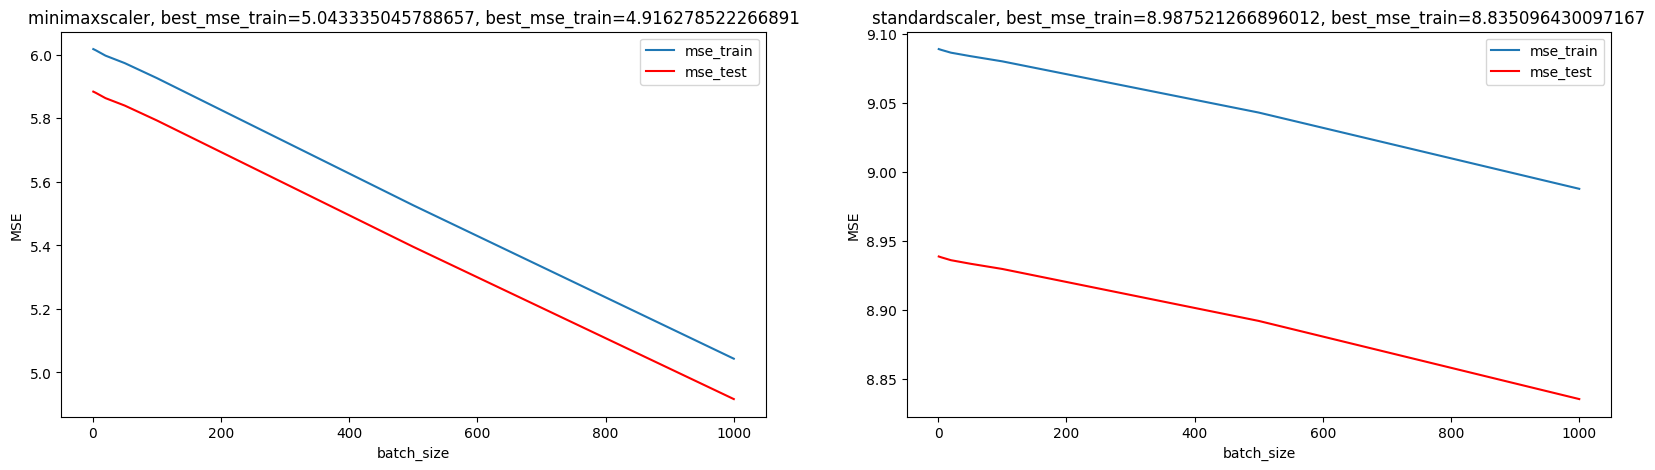

In [ ]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(b,mse_train_ms,label='mse_train')
ax1.plot(b,mse_min_test_ms,'r',label='mse_test')
ax1.set_xlabel('batch_size')
ax1.set_ylabel('MSE')
ax1.set_title(f'minimaxscaler, best_mse_train={mse_train_ms[index_best_ms]}, best_mse_train={mse_min_test_ms[index_best_ms]}')
ax1.legend()

ax2.plot(b,mse_train_ss,label='mse_train')
ax2.plot(b,mse_min_test_ss,'r',label='mse_test')
ax2.set_xlabel('batch_size')
ax2.set_ylabel('MSE')
ax2.set_title(f'standardscaler, best_mse_train={mse_train_ss[index_best_ss]}, best_mse_train={mse_min_test_ss[index_best_ss]}')
ax2.legend()
plt.show()

Gradient descent with gradient clipping (employing fixed learning rates) determines the optimal batch size through 500 training epochs, utilizing learning rates of 1.0 for MinMaxScaler-normalized data and 0.1 for StandardScaler-normalized data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

class fit_method:
    def __init__(self,D=1,method_name='GD'):
        self.method_name=method_name
        self.D=D
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def x_new(self,x):
        x_new_train=np.ones(x.shape[0])
        for i in range(1,self.D+1):
            x_new_train=np.c_[x_new_train,x**i]
        return x_new_train
    def Analytical_method(self,x,y):
     #   x=self.x_new(x)
        w=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        return w
    def f_x(self,x,w):
        y=x.dot(w)
        return y
    def GD_method(self,x,y,x1,y1,w,epochs=100,alpha=0.01,batch_size=32,early_stopping=False,patience=70, max_grad_norm=None, gradient_clip=True,adj_alpha=False):
     #   x=self.x_new(x)
     #   x1=self.x_new(x1)
        # Adaptive gradient clipping threshold based on batch size
        if max_grad_norm is None:
        # Larger batches need less clipping, smaller batches need more
          max_grad_norm = 5.0 * (np.sqrt(batch_size) / np.sqrt(x.shape[0]))
        mse_train=np.zeros(epochs)
        mse_test=np.zeros(epochs)
        iteration=int(x.shape[0]/batch_size)
        mse_min=np.inf
        mse_train1=None
        index=0
        for j in range(epochs):
            for i in range(iteration):
                gw=np.mean(np.repeat((self.f_x(x[batch_size*i:batch_size*(i+1),:],w)-y[batch_size*i:batch_size*(i+1),:]),x.shape[1],axis=1)*x[batch_size*i:batch_size*(i+1),:],axis=0,keepdims=True)
                # Track gradient norm
                grad_norm = np.linalg.norm(gw)
                # CRITICAL: Gradient clipping for small batches
                if gradient_clip and grad_norm > max_grad_norm:
                  gw = gw * (max_grad_norm / grad_norm)
                # Weight update with batch size adjustment
                # Smaller batches need smaller updates
                if adj_alpha:
                  alpha = alpha * (batch_size / x.shape[0])
                w =w-alpha*gw.reshape(-1,1)
            y_pred_train=self.f_x(x,w)
            y_pred_test=self.f_x(x1,w)
            mse_train[j]=mean_squared_error(y,y_pred_train)
            mse_test[j]=mean_squared_error(y1,y_pred_test)
            if mse_test[j]<mse_min:
              mse_min=mse_test[j]
              mse_train1=mse_train[j]
              index=j
            if j>=patience and early_stopping:
              if j-index>patience:
                print('early stopping')
                break
        return w,mse_train,mse_test,(mse_min,mse_train1,index)
D=4
mse_train_ms=[]
mse_train_ss=[]
mse_min_test_ms=[]
mse_min_test_ss=[]
index_ms=[]
index_ss=[]
w_ms=[]
w_ss=[]
epochs=500
b=[1,5,20,50,100,500,1000]
epochs=500
for batch_size in b:
  print("===================================================================================================")
  print(batch_size)
  np.random.seed(4)
  LR=fit_method(D=1)
  x_train_ms8=LR.x_new(x_train_ms)
  x_test_ms8=LR.x_new(x_test_ms)
  w0=np.random.randn(x_train_ms8.shape[1],1)
  w,mse_train_t,mse_test,(mse_min_ms,mse_train,index)=LR.GD_method(x_train_ms8,y_train,x_test_ms8,y_test,w0,epochs=epochs,alpha=1,batch_size=batch_size,gradient_clip=True,adj_alpha=False)
  mse_min_test_ms=mse_min_test_ms+[mse_min_ms]
  mse_train_ms.append(mse_train)
  index_ms=index_ms+[index]
  w_ms.append([w])

  LR1=fit_method(D=1)
  x_train_ss8=LR1.x_new(x_train_ss)
  x_test_ss8=LR1.x_new(x_test_ss)
  w1,mse_train1_t,mse_test1,(mse_min_ss,mse_train1,index1)=LR1.GD_method(x_train_ss8,y_train,x_test_ss8,y_test,w0,epochs=epochs,alpha=0.1,batch_size=batch_size,gradient_clip=True,adj_alpha=False)
  mse_min_test_ss=mse_min_test_ss+[mse_min_ss]
  mse_train_ss.append(mse_train1)
  index_ss=index_ss+[index1]
  w_ss.append([w1])



1
5
20
50
100
500
1000


Optimal batch sizes for gradient descent models trained with both MinMaxScaler and StandardScaler normalization methodologies (using gradient clipping with fixed learning rates), along with their corresponding training and test Mean Squared Error metrics, are presented.

In [ ]:
index_best_ms=mse_min_test_ms.index(min(mse_min_test_ms))
index_best_ss=mse_min_test_ss.index(min(mse_min_test_ss))
print('best batch size using minmaxscaler and clip gradient:',b[index_best_ms])
print(f'MSE_train of the model trained on data scaled by minmaxscaler: {mse_train_ms[index_best_ms]}')
print(f'MSE_test of the model trained on data scaled by minmaxscaler: {mse_min_test_ms[index_best_ms]}')
print("====================================================================================================")
print('best batch size using standardscaler and clip gradient:',b[index_best_ss])
print(f'MSE_train of the model trained on data scaled by standardscaler: {mse_train_ss[index_best_ss]}')
print(f'MSE_test of the model trained on data scaled by satndardscaler: {mse_min_test_ss[index_best_ss]}')

best batch size using minmaxscaler and clip gradient: 500
MSE_train of the model trained on data scaled by minmaxscaler: 0.5353793907071207
MSE_test of the model trained on data scaled by minmaxscaler: 0.5222846381204838
best batch size using standardscaler and clip gradient: 500
MSE_train of the model trained on data scaled by standardscaler: 0.5287875198200686
MSE_test of the model trained on data scaled by satndardscaler: 0.5239917271693804


Comparative visualization of Mean Squared Error as a function of batch size is presented for both MinMaxScaler and StandardScaler normalization methodologies, analyzing convergence characteristics across training and test dataset partitions.

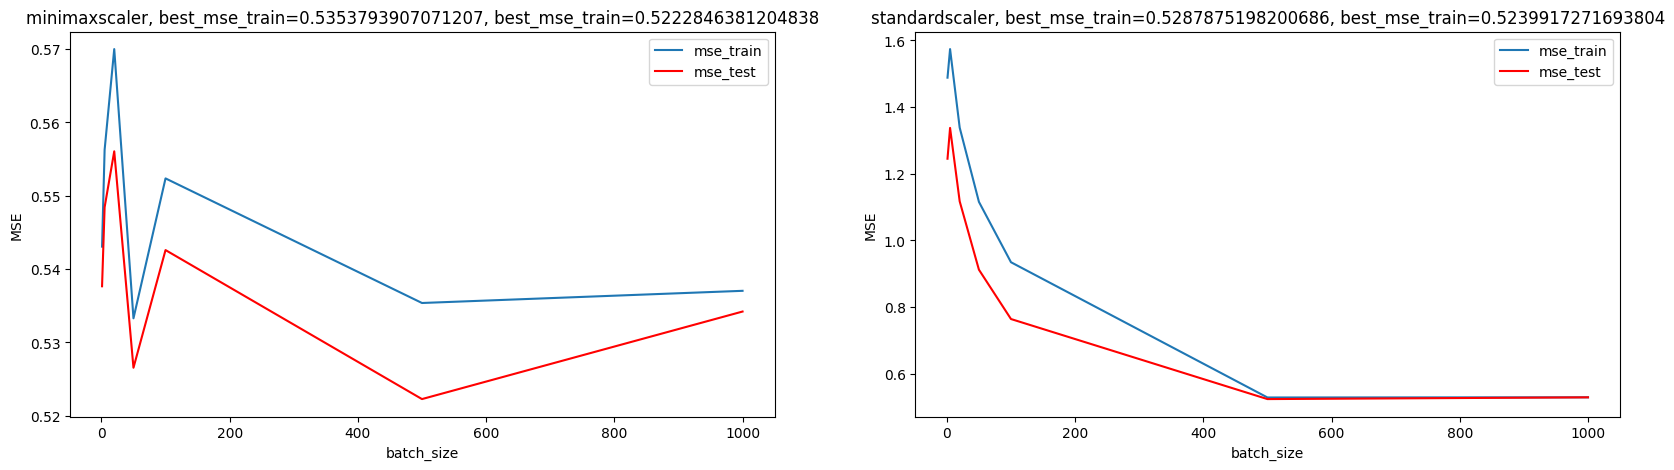

In [ ]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(b,mse_train_ms,label='mse_train')
ax1.plot(b,mse_min_test_ms,'r',label='mse_test')
ax1.set_xlabel('batch_size')
ax1.set_ylabel('MSE')
ax1.set_title(f'minimaxscaler, best_mse_train={mse_train_ms[index_best_ms]}, best_mse_train={mse_min_test_ms[index_best_ms]}')
ax1.legend()

ax2.plot(b,mse_train_ss,label='mse_train')
ax2.plot(b,mse_min_test_ss,'r',label='mse_test')
ax2.set_xlabel('batch_size')
ax2.set_ylabel('MSE')
ax2.set_title(f'standardscaler, best_mse_train={mse_train_ss[index_best_ss]}, best_mse_train={mse_min_test_ss[index_best_ss]}')
ax2.legend()
plt.show()